# Local Outlier Factor (LOF)
____
Unsupervised machine learning algorithm used for anomaly detection. It works by computing each points density with its neighbouring point and finds the ones with low density for outliers.

Works by;
- Identifying the n nearest neighbours,
- Computing the average distance to these points,
- Computing LRD (local reachability distance): defined as the inverse of the average distance. This LRD computes the density around the point.
- Computing LRD for each of the neighbours,
- Then computing the LOF for the point, which is defined as the ratio of the average of the LRD of the neighbouring points to its own LRD, comparing the densities.
- A higher ratio indicates that the neighbourhood of the point is sparse.

Let X be a dataset with n data points, where x_i denotes the i-th data point in X.

1. Calculate the k-distance of each point:
   - For each data point x_i, calculate the distance to its k-th nearest neighbor, denoted as D_k(x_i).

2. Calculate the reachability distance of each point:
   - For each pair of data points x_i and x_j, calculate the reachability distance from x_i to x_j, denoted as RD(x_i, x_j):
   
   RD(x_i, x_j) = max(D_k(x_j), dist(x_i, x_j))
   
   where dist(x_i, x_j) is the Euclidean distance between x_i and x_j.

3. Calculate the local reachability density (LRD) of each point:
   - For each data point x_i, calculate the LRD(x_i):
   
   LRD(x_i) = 1 / (sum(RD(x_i, x_j)) / k)
   
   where j is an index such that x_j is one of the k-nearest neighbors of x_i.

4. Calculate the local outlier factor (LOF) of each point:
   - For each data point x_i, calculate the LOF(x_i):
   
   LOF(x_i) = (sum(LRD(x_j)) / k) / LRD(x_i)
   
   where j is an index such that x_j is one of the k-nearest neighbors of x_i.
   
A data point with a high LOF score is considered an outlier, since it has a significantly lower density compared to its neighbors.

In [1]:
# Load Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
# Normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [3]:
# Apply LOF algorithm
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(X)


In [4]:
# Identify outliers
outlier_idx = y_pred == -1
outliers = X[outlier_idx]

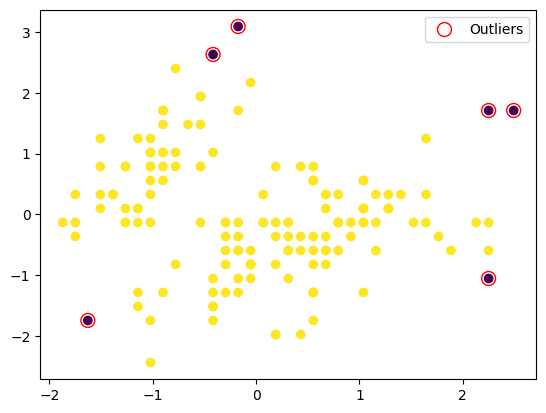

In [5]:
# Plot results
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(outliers[:, 0], outliers[:, 1], edgecolors='r', facecolors='none', s=100, label='Outliers')
plt.legend()
plt.show()
